In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape

(10000, 14)

In [43]:
# drop column RowNumber, CustomerID, Surname
df = df.iloc[:,3:]
df

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,42,2,0.00,1,1,1,101348.88,1
1,41,1,83807.86,1,0,1,112542.58,0
2,42,8,159660.80,3,1,0,113931.57,1
3,39,1,0.00,2,0,0,93826.63,0
4,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,0
9996,35,10,57369.61,1,1,1,101699.77,0
9997,36,7,0.00,1,0,1,42085.58,1
9998,42,3,75075.31,2,1,0,92888.52,1


# Descriptive analysis

In [24]:
# show statistics of each column
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [25]:
# Correlation matrix
r_matrix = df.corr().round(decimals = 2)
r_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01
Exited,-0.03,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00


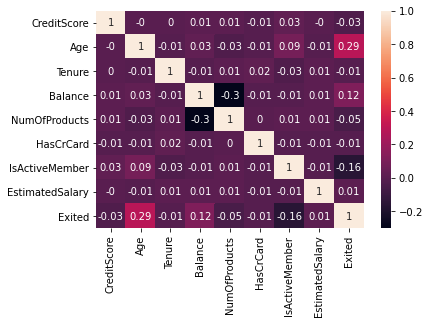

In [26]:
# Visualize correlation matrix
import seaborn as sns
sns.heatmap(r_matrix,annot = True)
# ==> it seems there is no relationship between variables

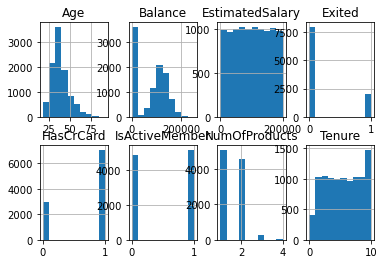

In [54]:
# Create histogram
import matplotlib.pyplot as plt
df.hist(layout = (2,4))
plt.show()
# ==> balance, creditscore: normal distribution

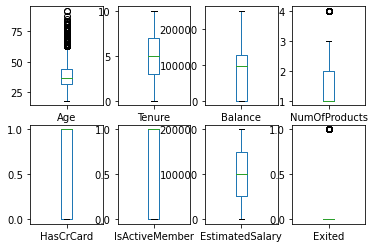

In [49]:
# Create box plot for each column
df.plot(kind = 'box',subplots = True, layout=(2,4), sharex = False, sharey = False)
plt.show()

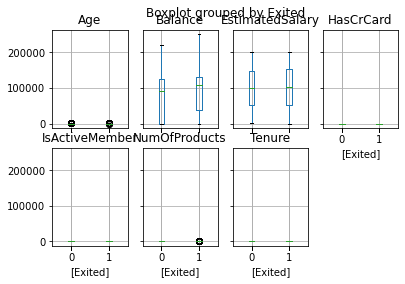

In [52]:
# Box plot group by Exited column
df.boxplot(by='Exited',layout = (2,4))
plt.show()
# ==> people who is predicted churn has more balance

# Null values and transformation

In [36]:
# Count number of null values in each columns
df.isnull().sum()
# ==> no need to dealing with missing data

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [59]:
# Dealing with extreme outliers 
from scipy import stats
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,42,2,0.00,1,1,1,101348.88,1
1,41,1,83807.86,1,0,1,112542.58,0
2,42,8,159660.80,3,1,0,113931.57,1
3,39,1,0.00,2,0,0,93826.63,0
4,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,0
9996,35,10,57369.61,1,1,1,101699.77,0
9997,36,7,0.00,1,0,1,42085.58,1
9998,42,3,75075.31,2,1,0,92888.52,1


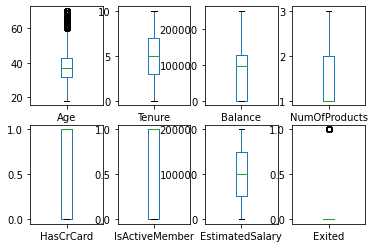

In [60]:
# Create box plot again
df.plot(kind = 'box',subplots = True, layout=(2,4), sharex = False, sharey = False)
plt.show()

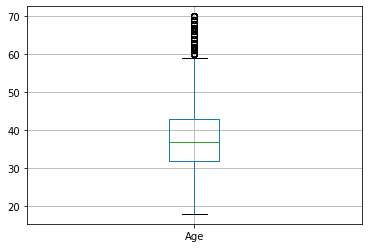

In [63]:
df.boxplot(column = ['Age'])